In [1]:
%matplotlib inline

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
pd.set_option("display.max_columns", 100)

In [10]:
coaster = pd.read_csv("coaster_db.csv")

In [22]:
coaster = coaster[['coaster_name', 
         #'Length', 'Speed', 
         'Location', 'Status',
         #'Opening date',
       #'Type', 
         'Manufacturer',
         #'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 
         #'Opened', 
         #'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
         #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
         #'height_value', 'height_unit', 
         'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [28]:
#Convert the opening_date_clean to datime
coaster["opening_date_clean"] = pd.to_datetime(coaster["opening_date_clean"])

In [29]:
coaster.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [31]:
#Find isna valus in the entire dataset 
coaster.isna().sum()

coaster_name            0
Location                0
Status                213
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [37]:
#Find the duplicates
coaster.loc[coaster.duplicated()]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [38]:
#Find duplicates on a subset

In [42]:
coaster.loc[coaster.duplicated(subset=["coaster_name"])]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [45]:
#Find the duplicates with query command
coaster.query('coaster_name == "Crystal Beach Cyclone"')

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [46]:
#Removing duplicates
coaster.columns


Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [52]:
coaster = coaster.loc[~coaster.duplicated(subset=['coaster_name', 'Location', 'opening_date_clean'])].reset_index(drop=True).copy()

In [53]:
coaster.shape

(990, 13)

In [55]:
#How many coasters per year
coaster['year_introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: year_introduced, Length: 101, dtype: int64

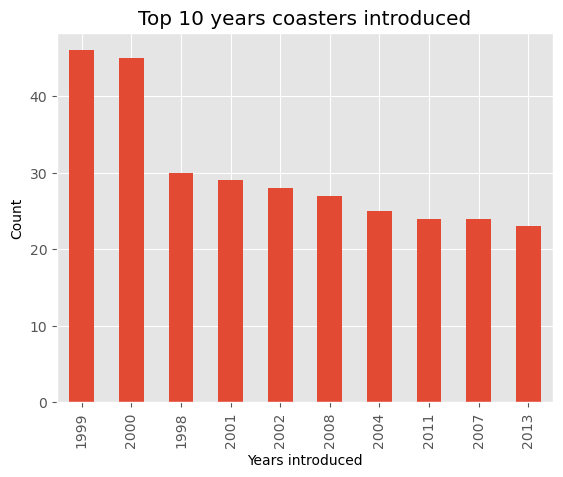

In [72]:
#Plot the info
ax = coaster['year_introduced'].value_counts() \
    .head(10)\
    .plot(kind = "bar", title = "Top 10 years coasters introduced")
ax.set_xlabel("Years introduced")
ax.set_ylabel("Count")
plt.show()

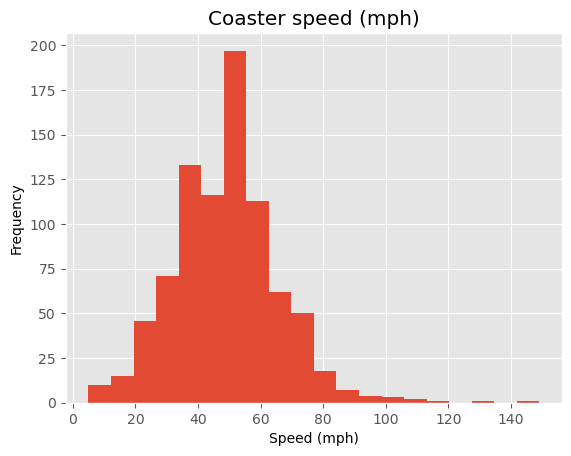

In [71]:
#Check the speed distribution with histogram
ax = coaster["speed_mph"].plot(kind="hist",
                         bins = 20,
                         title = "Coaster speed (mph)")
ax.set_xlabel("Speed (mph)")
plt.show()

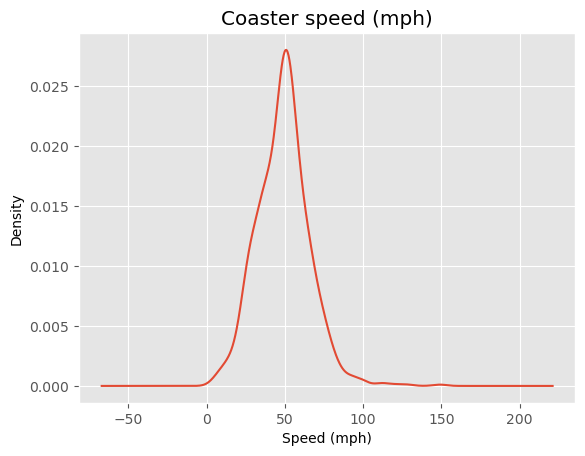

In [73]:
#Check the speed distribution with kde
ax = coaster["speed_mph"].plot(kind="kde",
                         title = "Coaster speed (mph)")
ax.set_xlabel("Speed (mph)")
plt.show()

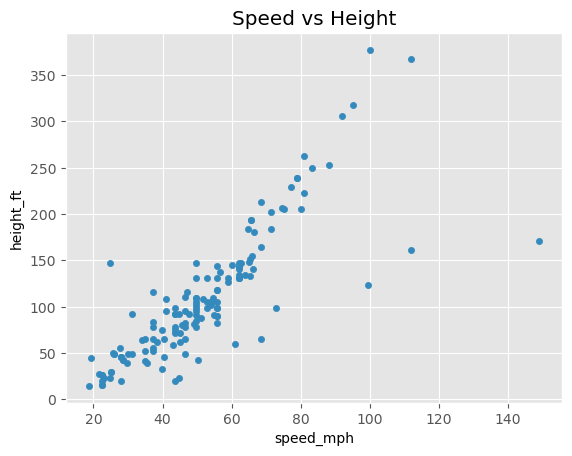

In [76]:
coaster.plot(kind = "scatter",
            x = "speed_mph",
            y = "height_ft",
            title = "Speed vs Height")
plt.show()

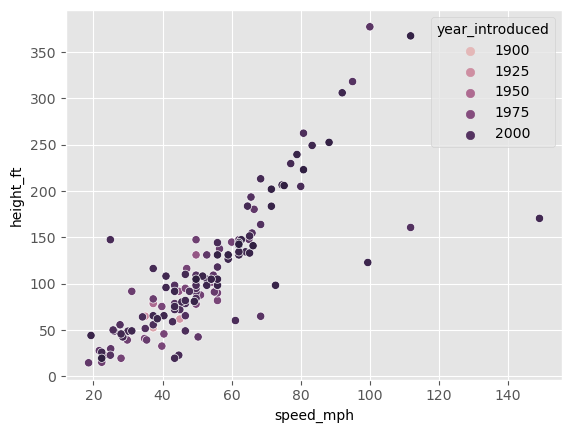

In [79]:
sns.scatterplot(x = "speed_mph",
                y = "height_ft",
                hue = 'year_introduced',
                data = coaster)
plt.show()

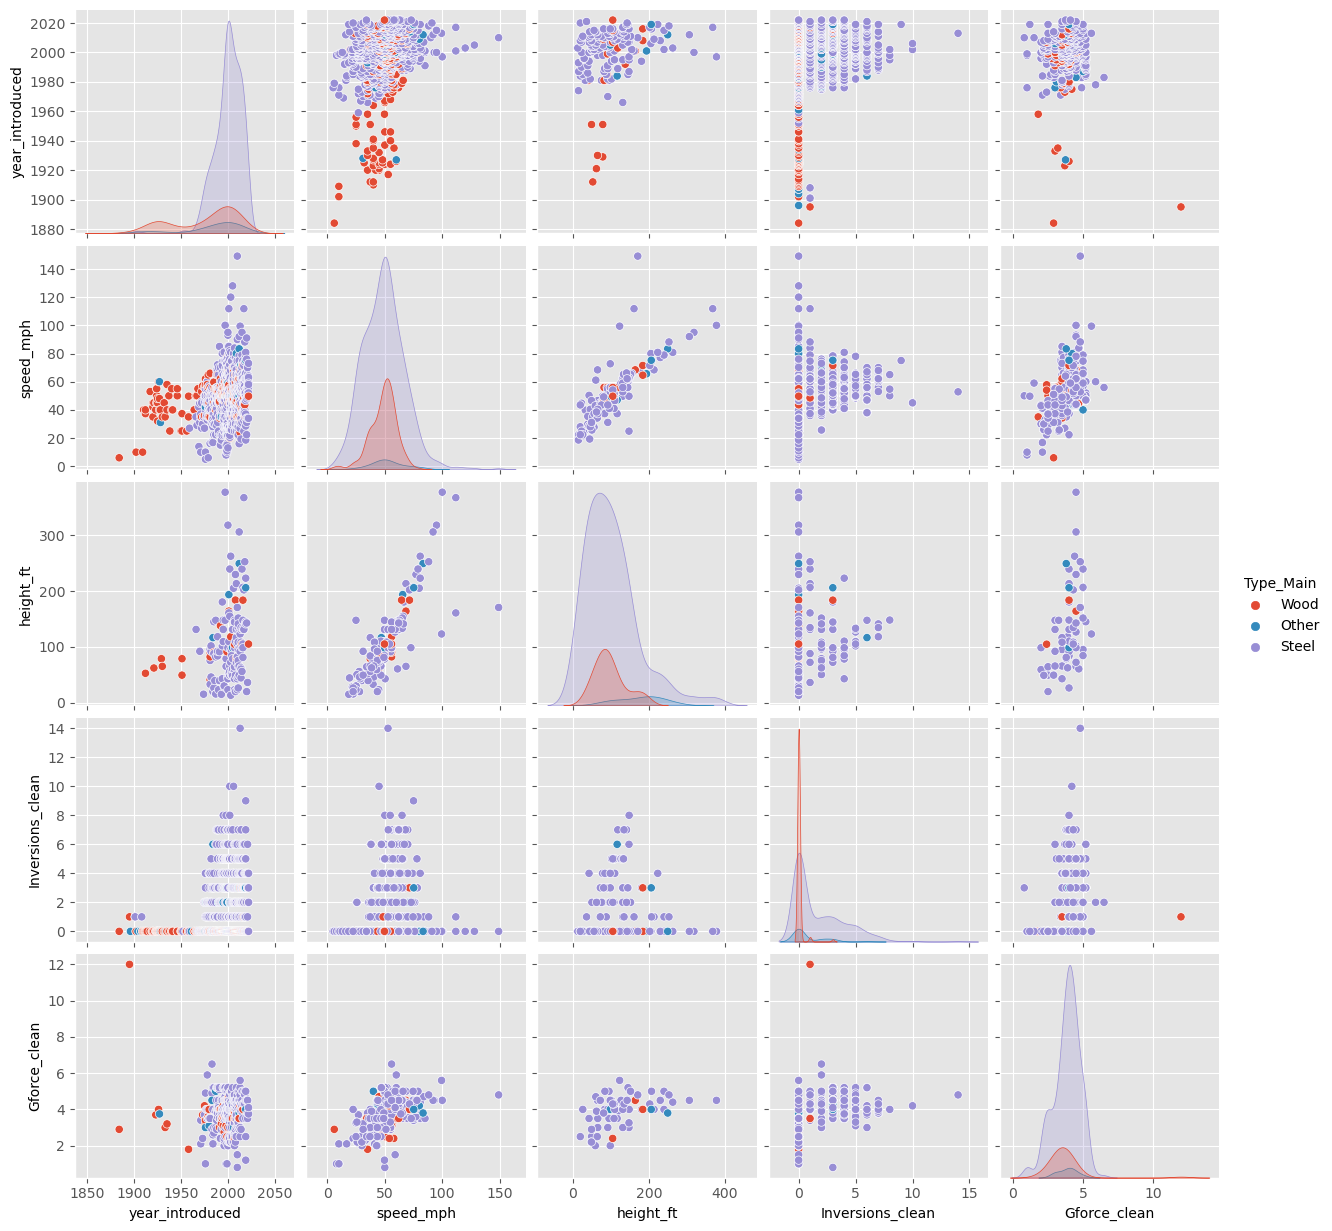

In [84]:
sns.pairplot(coaster, 
             vars = ['year_introduced','speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
            hue = "Type_Main")
plt.show()

In [85]:
coaster[(coaster["Gforce_clean"] >= 6 )]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0
197,Moonsault Scramble,Fuji-Q Highland,Removed,Meisho Amusement Machines,1983,35.487,138.780,Steel,1983-06-24,55.9,NaN,2,6.5


In [86]:
#Find the locations with the fastest coasters - over 10
coaster.columns


Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

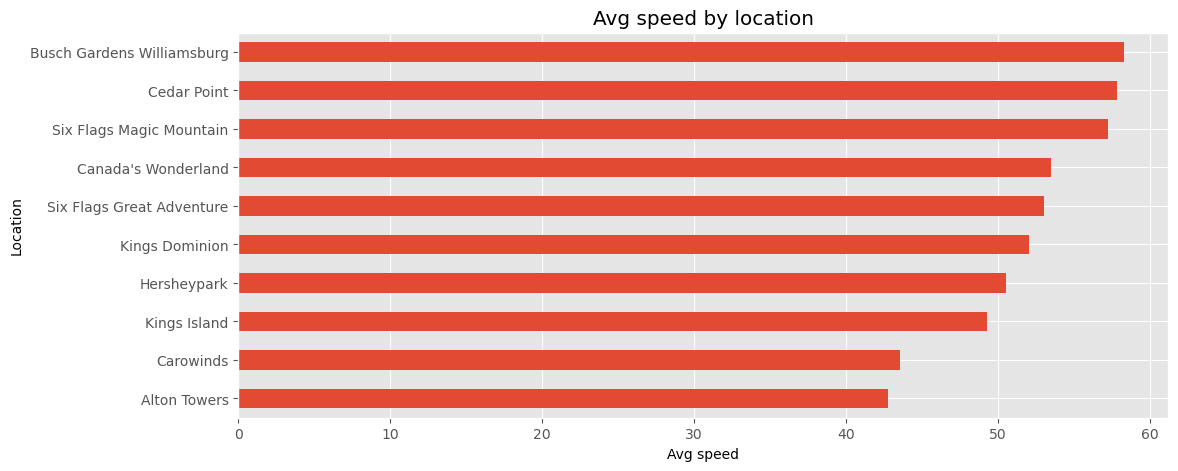

In [101]:
ax = coaster.query('Location != "Other"') \
    .groupby("Location")["speed_mph"] \
    .agg(['mean', 'count']) \
    .query(' count > 10') \
    .sort_values("mean")['mean'] \
    .plot(kind = 'barh', figsize = (12, 5), title = "Avg speed by location")
ax.set_xlabel('Avg speed')
plt.show()